In [1]:
from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

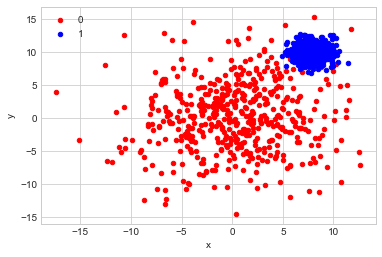

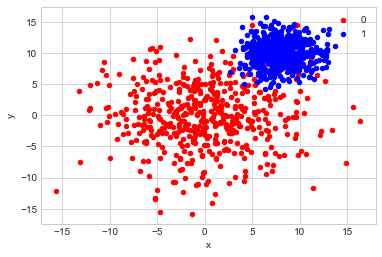

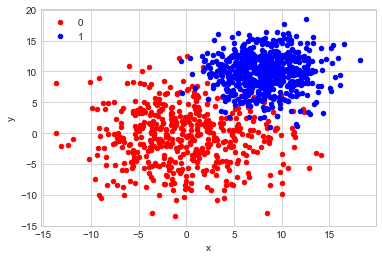

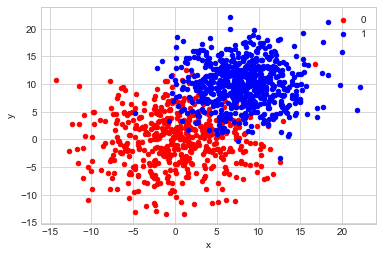

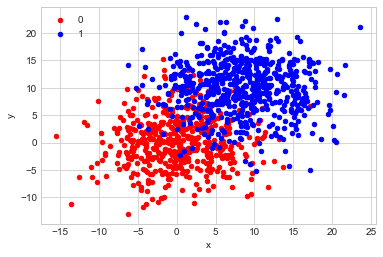

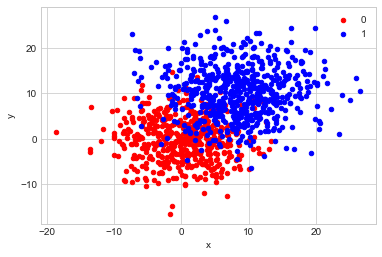

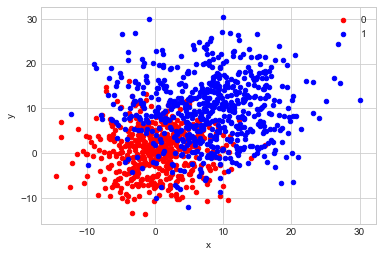

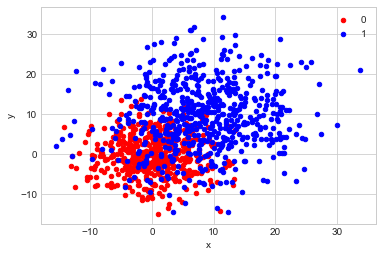

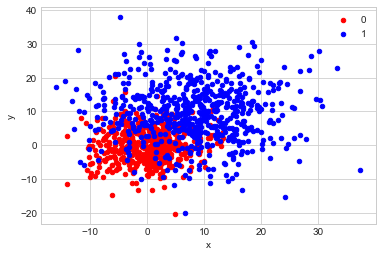

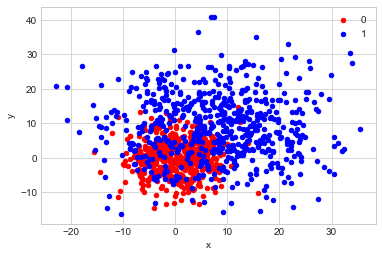

In [3]:
scale = np.arange(1,11)

for i in scale:
    features, labels = make_blobs(n_samples = [500, 600], n_features = 2, centers =[(0,0),(8,10)],
                                 cluster_std = [5,i], shuffle = True)
    
    df = pd.DataFrame({'x':features[:,0], 'y':features[:,1], 'label':labels})
    colors = {0:'red', 1:'blue'}
    
    grouped = df.groupby('label')
    fig, ax = plt.subplots()
    for key, group in grouped:
        group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

In [4]:
std_dev = np.arange(1,21)

qda_accuracy=[]
lda_accuracy=[]
dt_accuracy=[]

for it in std_dev:
  feat, true_labels = make_blobs(n_samples =[500,500] ,
                  n_features = 2, 
                  centers =[(0,0),(5,15)] ,
                  cluster_std = [5,it],
                  shuffle = True,random_state=43)
  features= StandardScaler().fit_transform(feat)
  X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.3, random_state=42)
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train,y_train)
  pred=qda.predict(X_test)
  qda_accuracy.append(accuracy_score(y_test,pred))
  lda=LinearDiscriminantAnalysis()
  lda.fit(X_train,y_train)
  pred=lda.predict(X_test)
  lda_accuracy.append(accuracy_score(y_test,pred))
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  pred=dt.predict(X_test)
  dt_accuracy.append(accuracy_score(y_test,pred))


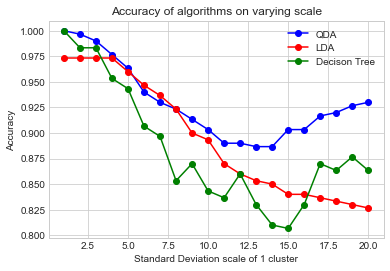

In [5]:
plt.plot(std_dev,(qda_accuracy),'bo-',label="QDA")
plt.plot(std_dev,(lda_accuracy),'ro-',label="LDA")
plt.plot(std_dev,(dt_accuracy),'go-',label="Decison Tree")
plt.title("Accuracy of algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
random_value_x = np.random.uniform(-100, 100, size=200)
random_value_y = np.random.uniform(-100, 100, size=200)

def simulate_data_K2(
    features,
    samples,
    sd,
    non_informative_features = 0,
    center = 3
):
  inform_features = features - non_informative_features 
  assert inform_features >= 1, 'informative features should be >= 1'

  # Add informative features
  features, true_labels = make_blobs(
      n_samples = samples,
      n_features = inform_features, 
      centers = [np.zeros(inform_features), center * np.ones(inform_features)],
      cluster_std = sd,
      shuffle = True,
      random_state = 43
  )

  # Add non informative features
  sd_max = np.array(sd).flatten().max()
  sd_min = np.array(sd).flatten().min()

  total_samples = sum(samples)
  maxi = center
  mini = 0

  random_value_x = np.random.uniform(
      mini - sd_min,
      maxi + sd_max,
      size = (total_samples, non_informative_features)
  )
  
  features = np.c_[features, random_value_x]
  return features, true_labels

In [7]:
std_dev=np.arange(1,21)
qda_accuracy=[]
lda_accuracy=[]
dt_accuracy=[]

for it in std_dev:
  feat, true_labels = simulate_data_K2(features = 150,
                non_informative_features = 20,
                samples = [500,700],
                sd = [5, it])
  features= StandardScaler().fit_transform(feat)
 
  X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.3, random_state=42)
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train,y_train)
  pred=qda.predict(X_test)
  qda_accuracy.append(accuracy_score(y_test,pred))
  lda=LinearDiscriminantAnalysis()
  lda.fit(X_train,y_train)
  pred=lda.predict(X_test)
  lda_accuracy.append(accuracy_score(y_test,pred))
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  pred=dt.predict(X_test)
  dt_accuracy.append(accuracy_score(y_test,pred))

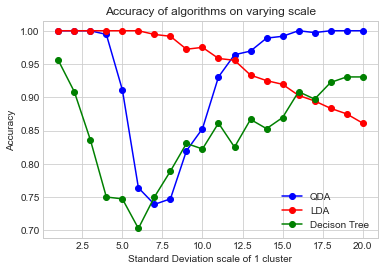

In [8]:
plt.plot(std_dev,(qda_accuracy),'bo-',label="QDA")
plt.plot(std_dev,(lda_accuracy),'ro-',label="LDA")
plt.plot(std_dev,(dt_accuracy),'go-',label="Decison Tree")
plt.title("Accuracy of algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [9]:
std_dev=np.arange(1,21)
qda_accuracy=[]
lda_accuracy=[]
dt_accuracy=[]

for it in std_dev:
  feat, true_labels = simulate_data_K2(features = 150,
                non_informative_features = 0,
                samples = [500,700],
                sd = [5, it])
  features= StandardScaler().fit_transform(feat)
  X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.3, random_state=42)
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train,y_train)
  pred=qda.predict(X_test)
  qda_accuracy.append(accuracy_score(y_test,pred))
  lda=LinearDiscriminantAnalysis()
  lda.fit(X_train,y_train)
  pred=lda.predict(X_test)
  lda_accuracy.append(accuracy_score(y_test,pred))
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  pred=dt.predict(X_test)
  dt_accuracy.append(accuracy_score(y_test,pred))

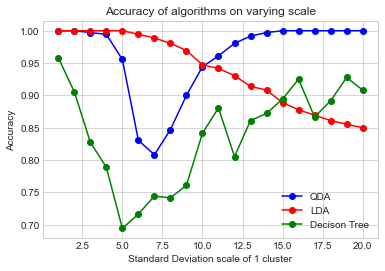

In [10]:
plt.plot(std_dev,(qda_accuracy),'bo-',label="QDA")
plt.plot(std_dev,(lda_accuracy),'ro-',label="LDA")
plt.plot(std_dev,(dt_accuracy),'go-',label="Decison Tree")
plt.title("Accuracy of algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# feature selection
def select_features(X, y, score_func, ite = 10):
    fs_scores = np.zeros((ite, X.shape[1]))
    for i in range(ite):
        kf = KFold(n_splits=5, shuffle = True)
        
        for train_index, test_index in kf.split(X):
            X_train = X[train_index]
            y_train= y[train_index]
            
            fs = SelectKBest(score_func= score_func, k='all')
            fs.fit(X[train_index], y[train_index])
            X_train_fs = fs.transform(X[train_index])
            X_test_fs = fs.transform(X[test_index])
            fs_scores[i] = np.add(fs_scores[i], fs.scores_)

    return fs_scores

Simulation for standard dev: 1


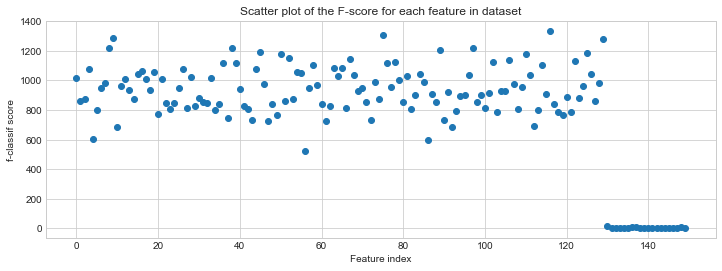

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 2


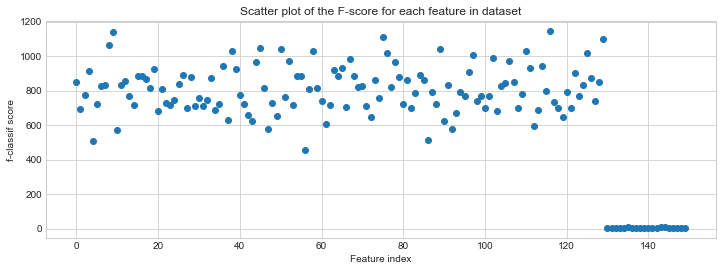

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 3


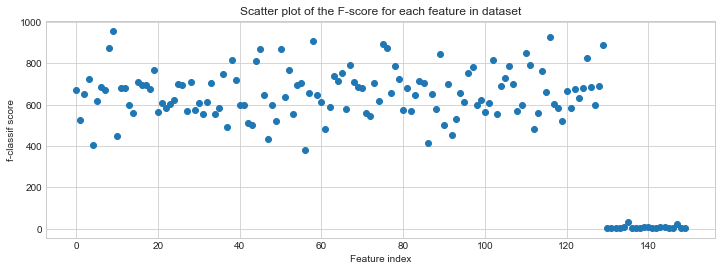

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 4


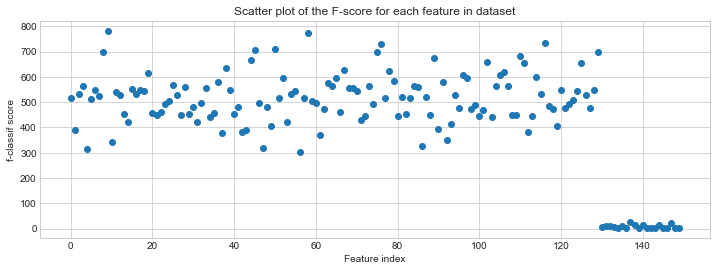

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 5


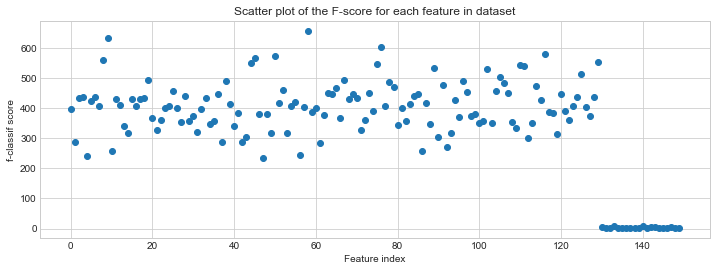

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 6


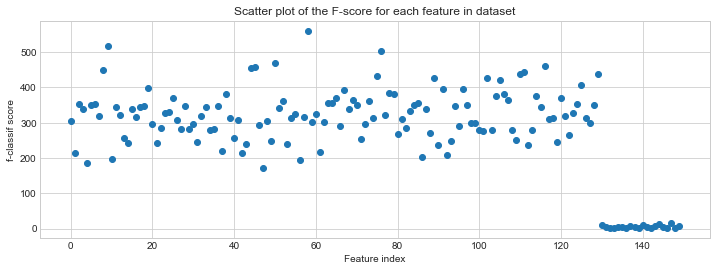

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 7


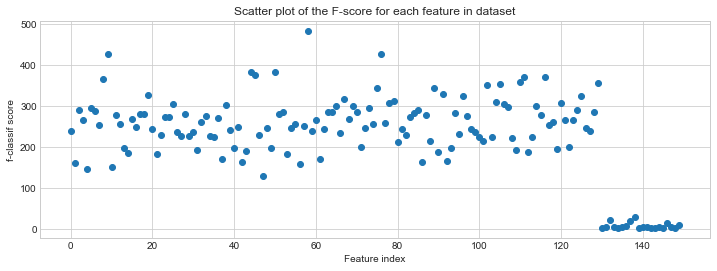

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 8


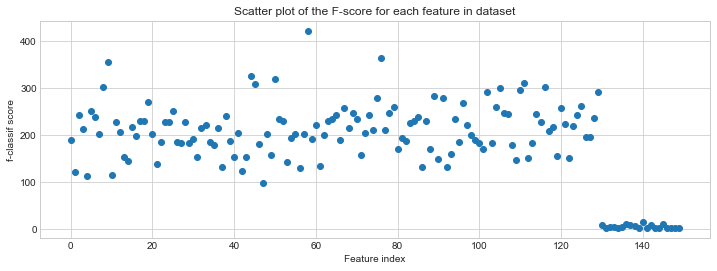

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 9


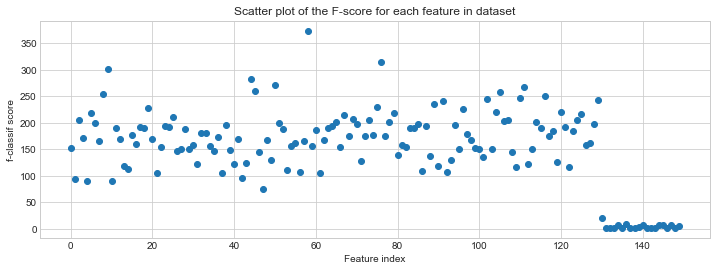

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 10


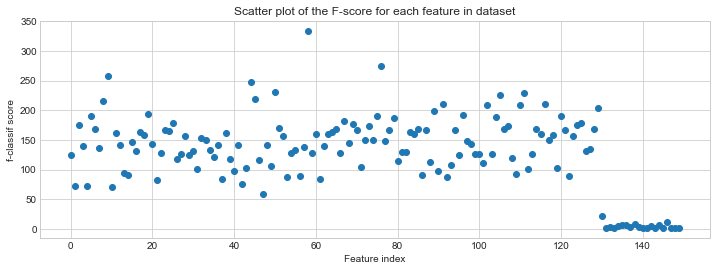

Number of coeffecients with f-score less than 50: 20
Simulation for standard dev: 11


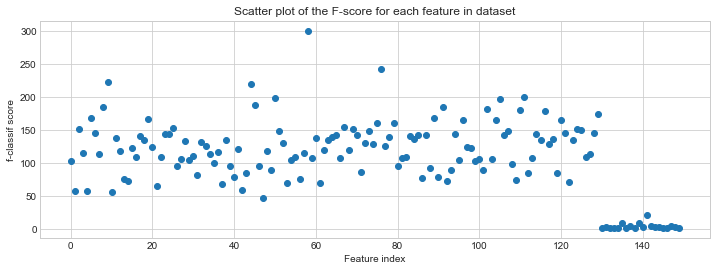

Number of coeffecients with f-score less than 50: 21
Simulation for standard dev: 12


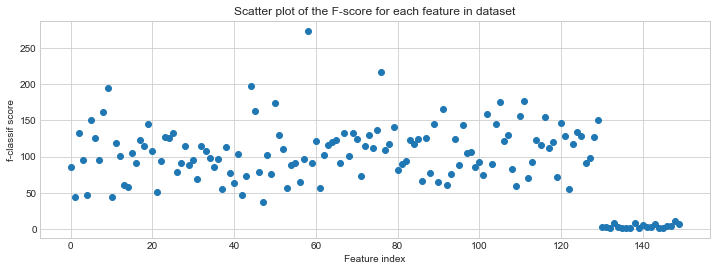

Number of coeffecients with f-score less than 50: 25
Simulation for standard dev: 13


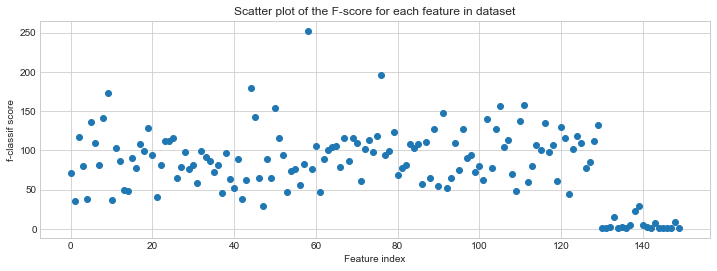

Number of coeffecients with f-score less than 50: 33
Simulation for standard dev: 14


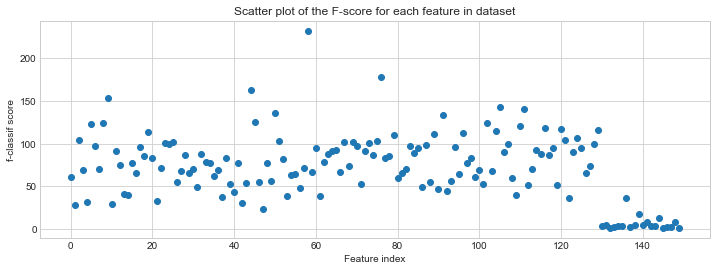

Number of coeffecients with f-score less than 50: 39
Simulation for standard dev: 15


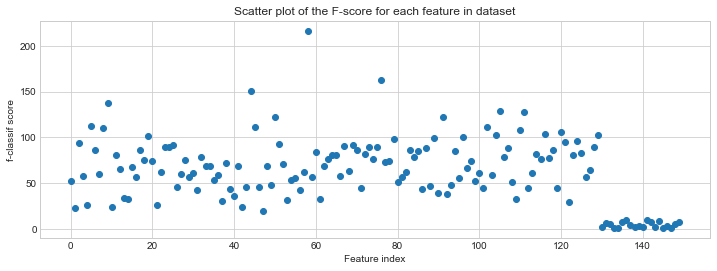

Number of coeffecients with f-score less than 50: 50
Simulation for standard dev: 16


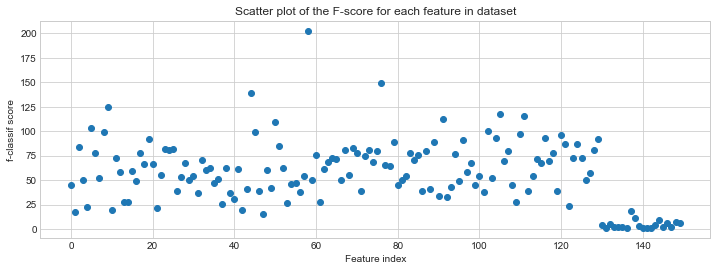

Number of coeffecients with f-score less than 50: 63
Simulation for standard dev: 17


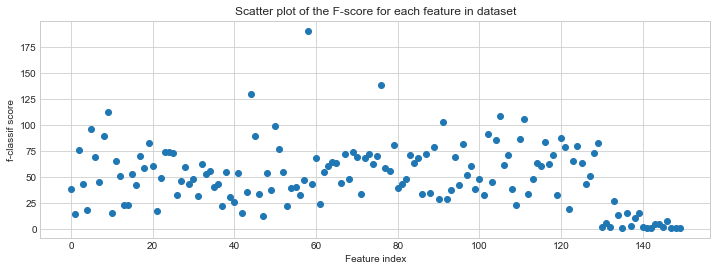

Number of coeffecients with f-score less than 50: 76
Simulation for standard dev: 18


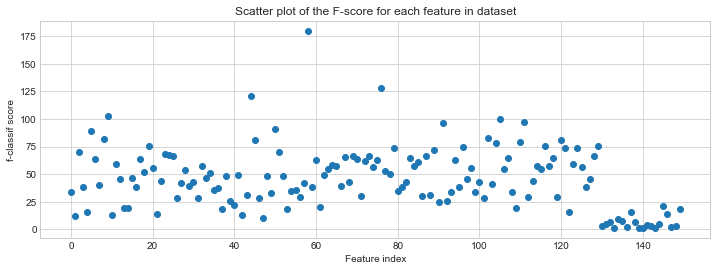

Number of coeffecients with f-score less than 50: 87
Simulation for standard dev: 19


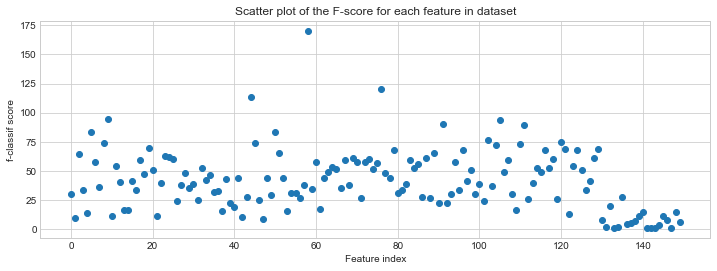

Number of coeffecients with f-score less than 50: 94
Simulation for standard dev: 20


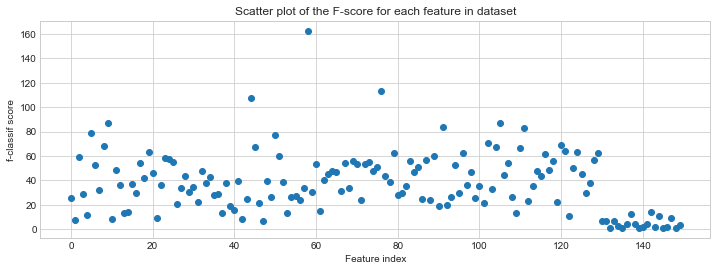

Number of coeffecients with f-score less than 50: 106


In [12]:
std_dev=np.arange(1,21)
for it in std_dev:
  print("Simulation for standard dev:",it)
  features, true_labels = simulate_data_K2(features = 150,
                non_informative_features = 20,
                samples = [500,700],
                sd = [5, it])
  df_features = pd.DataFrame()
  x = StandardScaler().fit_transform(features)
  # feature selection
  fs = select_features(x,true_labels,f_classif)
  mean_fs = np.mean(fs, axis = 0)
  std_error = np.std(fs, axis = 0)/ np.sqrt(10)
  plt.figure(figsize=(12,4))
  plt.errorbar([i for i in range(len(mean_fs))], mean_fs, yerr=std_error, fmt = 'o')
  plt.xlabel("Feature index")
  plt.ylabel("f-classif score")
  plt.title("Scatter plot of the F-score for each feature in dataset")
  plt.show()
  # df_features['f1score'] = np.argsort(-1*mean_fs)[:20] 
  # print("Selected top 10 features : ", np.argsort(-1*mean_fs)[:10])
  print(f'Number of coeffecients with f-score less than 50: {len(np.where(mean_fs <= 50)[0])}')  

In [13]:
random_value_x = np.random.uniform(-100, 100, size=200)
random_value_y = np.random.uniform(-100, 100, size=200)

def simulate_data_K3(
    features,
    samples,
    sd,
    non_informative_features = 0,
    center1 = 5,
    center2 = 10,
    
):
  inform_features = features - non_informative_features 
  assert inform_features >= 1, 'informative features should be >= 1'

  # Add informative features
  features, true_labels = make_blobs(
      n_samples = samples,
      n_features = inform_features, 
      centers = [np.zeros(inform_features), center1 * np.ones(inform_features), center2 * np.ones(inform_features) ],
      cluster_std = sd,
      shuffle = True,
      random_state = 43
  )

  # Add non informative features
  sd_max = np.array(sd).flatten().max()
  sd_min = np.array(sd).flatten().min()

  total_samples = sum(samples)
  maxi = center2
  mini = 0

  random_value_x = np.random.uniform(
      mini - sd_min,
      maxi + sd_max,
      size = (total_samples, non_informative_features)
  )
  
  features = np.c_[features, random_value_x]
  return features, true_labels


In [14]:
std_dev=np.arange(1,21)
qda_accuracy=[]
lda_accuracy=[]
dt_accuracy=[]

for it in std_dev:
  feat, true_labels = simulate_data_K3(
                features = 150,
                non_informative_features =20 ,
                samples = [500,700,300],
                sd = [5, it, 4],
                center1 = 10,
                center2 = 20
          )
  features= StandardScaler().fit_transform(feat)
 
  X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.3, random_state=42)
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train,y_train)
  pred=qda.predict(X_test)
  qda_accuracy.append(accuracy_score(y_test,pred))
  lda=LinearDiscriminantAnalysis()
  lda.fit(X_train,y_train)
  pred=lda.predict(X_test)
  lda_accuracy.append(accuracy_score(y_test,pred))
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  pred=dt.predict(X_test)
  dt_accuracy.append(accuracy_score(y_test,pred))

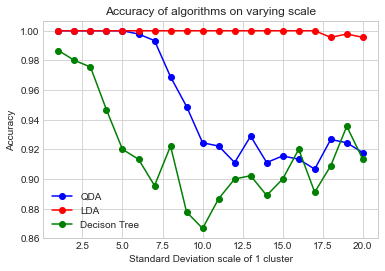

In [15]:
plt.plot(std_dev,(qda_accuracy),'bo-',label="QDA")
plt.plot(std_dev,(lda_accuracy),'ro-',label="LDA")
plt.plot(std_dev,(dt_accuracy),'go-',label="Decison Tree")
plt.title("Accuracy of algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
std_dev=np.arange(1,21)
qda_accuracy=[]
lda_accuracy=[]
dt_accuracy=[]

for it in std_dev:
  features, true_labels = simulate_data_K3(
                features = 150,
                non_informative_features =0 ,
                samples = [500,700,300],
                sd = [5, it, 4],
                center1 = 10,
                center2 = 20
          )
 
  X_train, X_test, y_train, y_test = train_test_split(features, true_labels, test_size=0.3, random_state=42)
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train,y_train)
  pred=qda.predict(X_test)
  qda_accuracy.append(accuracy_score(y_test,pred))
  lda=LinearDiscriminantAnalysis()
  lda.fit(X_train,y_train)
  pred=lda.predict(X_test)
  lda_accuracy.append(accuracy_score(y_test,pred))
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  pred=dt.predict(X_test)
  dt_accuracy.append(accuracy_score(y_test,pred))

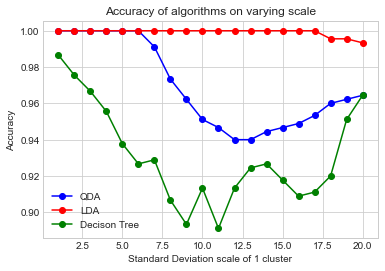

In [17]:
plt.plot(std_dev,(qda_accuracy),'bo-',label="QDA")
plt.plot(std_dev,(lda_accuracy),'ro-',label="LDA")
plt.plot(std_dev,(dt_accuracy),'go-',label="Decison Tree")
plt.title("Accuracy of algorithms on varying scale")
plt.xlabel("Standard Deviation scale of 1 cluster")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Data simulation for std: 1


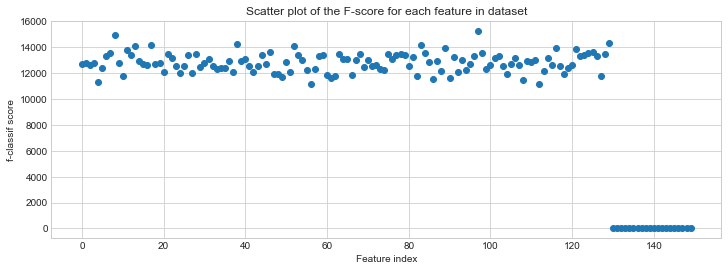

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 2


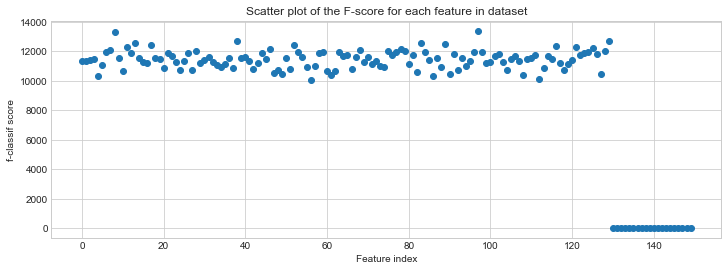

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 3


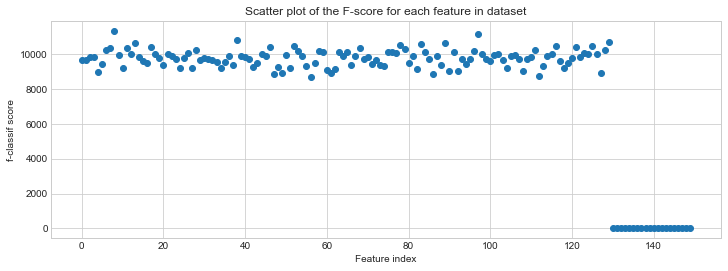

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 4


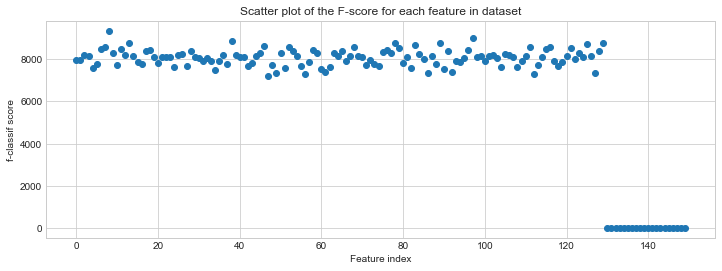

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 5


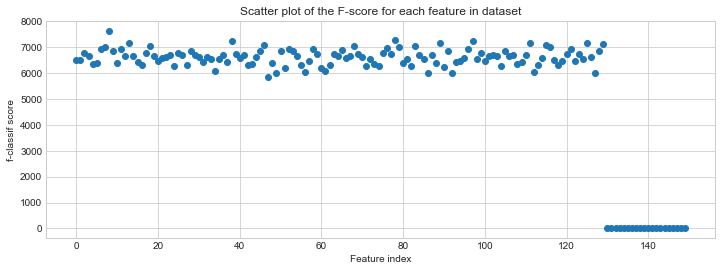

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 6


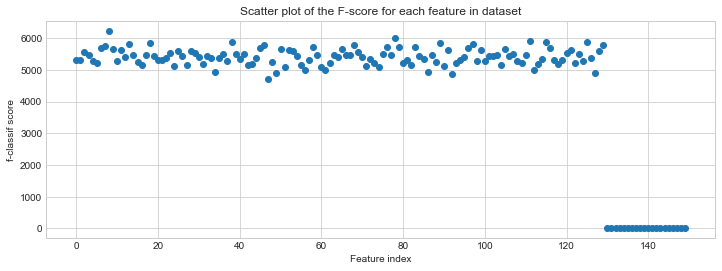

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 7


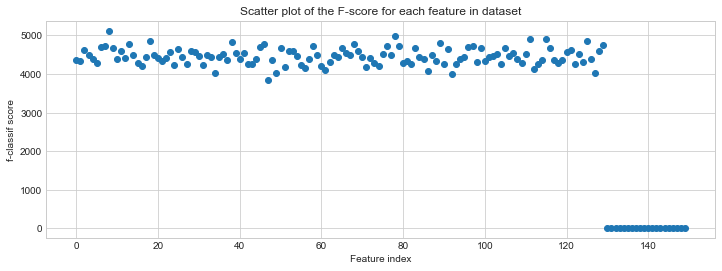

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 8


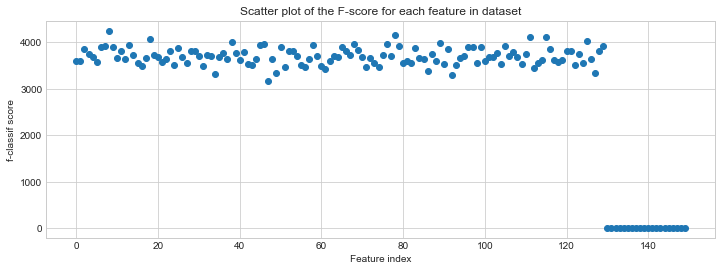

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 9


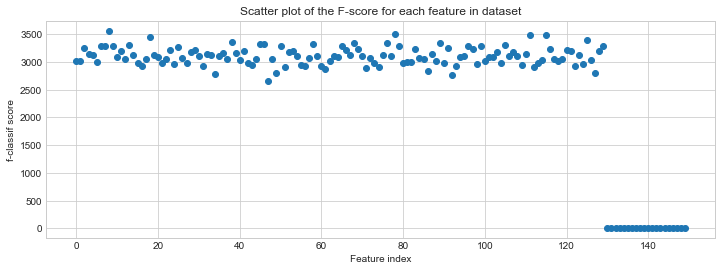

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 10


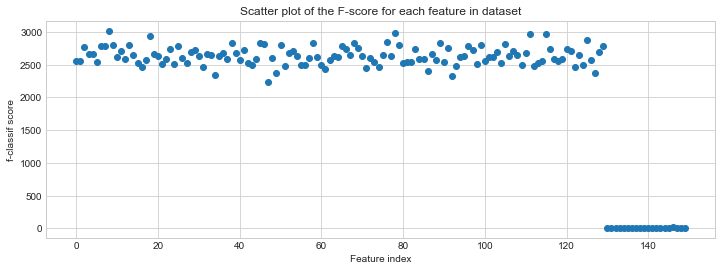

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 11


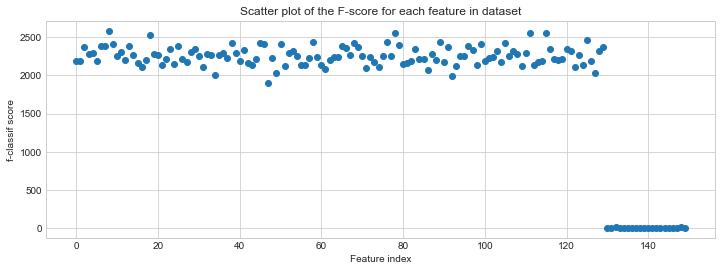

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 12


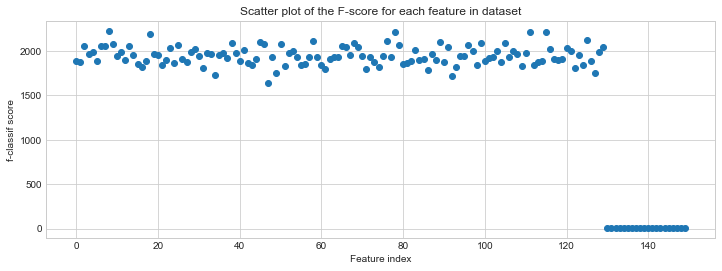

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 13


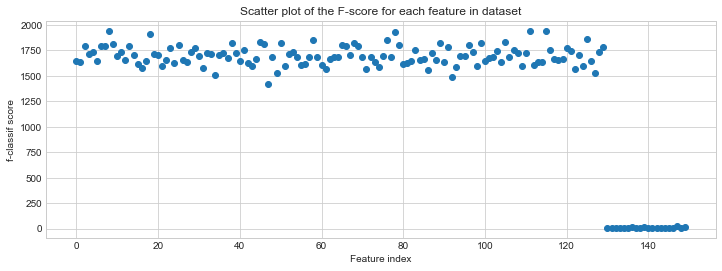

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 14


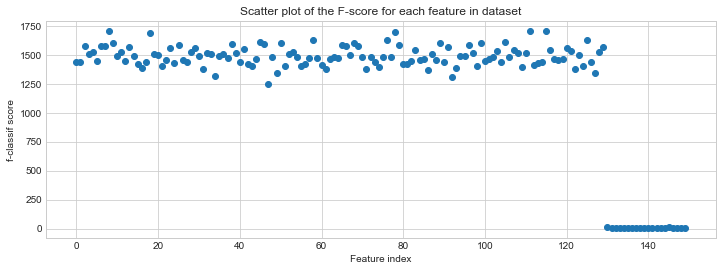

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 15


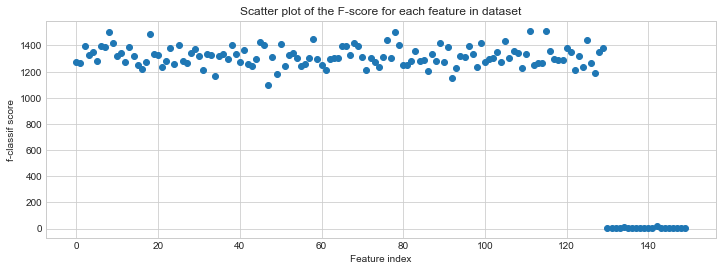

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 16


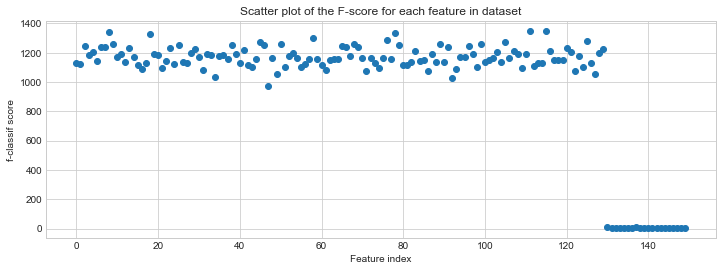

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 17


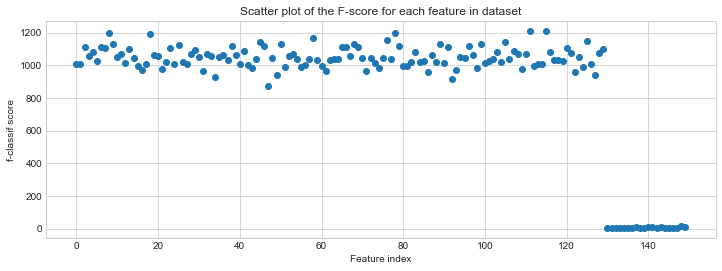

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 18


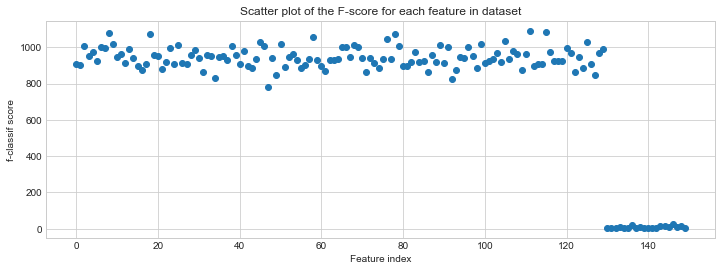

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 19


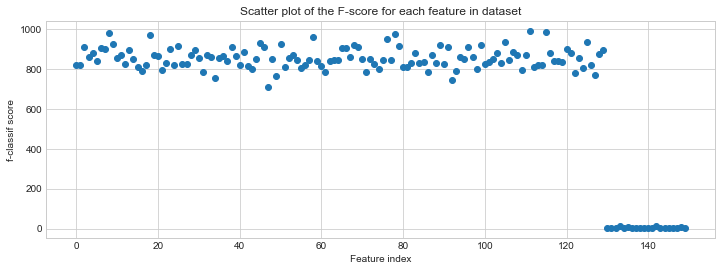

Number of coeffecients with f-score less than 50: 20
Data simulation for std: 20


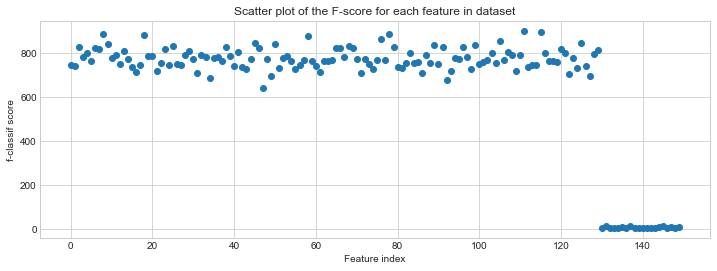

Number of coeffecients with f-score less than 50: 20


In [18]:
std_dev=np.arange(1,21)
for it in std_dev:
  print("Data simulation for std:",it)
  features, true_labels = simulate_data_K3(
                features = 150,
                non_informative_features =20 ,
                samples = [500,700,300],
                sd = [5, it, 4],
                center1 = 10,
                center2 = 20
          )
  
  df_features = pd.DataFrame()
  x = StandardScaler().fit_transform(features)
  # feature selection
  fs = select_features(x,true_labels,f_classif)
  mean_fs = np.mean(fs, axis = 0)
  std_error = np.std(fs, axis = 0)/ np.sqrt(10)
  plt.figure(figsize=(12,4))
  plt.errorbar([i for i in range(len(mean_fs))], mean_fs, yerr=std_error, fmt = 'o')
  plt.xlabel("Feature index")
  plt.ylabel("f-classif score")
  plt.title("Scatter plot of the F-score for each feature in dataset")
  plt.show()
  # df_features['f1score'] = np.argsort(-1*mean_fs)[:20] 
  # print("Selected top 10 features : ", np.argsort(-1*mean_fs)[:10])
  print(f'Number of coeffecients with f-score less than 50: {len(np.where(mean_fs <= 50)[0])}')
  
